In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier



In [2]:
# Read the CSV file
df_org = pd.read_csv("file:///Users/genevauy/Desktop/DATA_Customer-Churn.csv")


In [3]:
# Convert column names to lowercase
df_org = df_org.rename(columns=lambda x: x.lower())


In [4]:
# Select relevant columns
selected_columns = ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn']
df = df_org[selected_columns].copy()


In [5]:
# Convert 'churn' column values to numeric
df["churn"] = df["churn"].map({'No': 0, 'Yes': 1})


In [6]:

# Convert 'totalcharges' column to float
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')


In [7]:

# Handle missing values in 'totalcharges' column
mean_totalcharges = df['totalcharges'].mean()
df['totalcharges'].fillna(mean_totalcharges, inplace=True)


In [8]:

# Split the data into training and test sets
X = df[['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges']]
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)



In [9]:

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

# Performance metrics for Logistic Regression
performance_log = pd.DataFrame({'Error_metric': ['Accuracy', 'Precision', 'Recall'],
                                'Train': [accuracy_score(y_train, y_pred_train_log),
                                          precision_score(y_train, y_pred_train_log),
                                          recall_score(y_train, y_pred_train_log)],
                                'Test': [accuracy_score(y_test, y_pred_test_log),
                                         precision_score(y_test, y_pred_test_log),
                                         recall_score(y_test, y_pred_test_log)]})
display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.789315,0.799858
1,Precision,0.649606,0.690476
2,Recall,0.442656,0.460317


In [11]:
# Confusion matrix for Logistic Regression
cm_train_log = confusion_matrix(y_train, y_pred_train_log)
cm_test_log = confusion_matrix(y_test, y_pred_test_log)


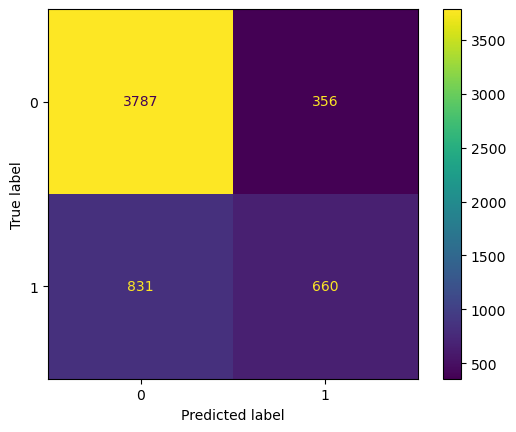

In [12]:

disp_train_log = ConfusionMatrixDisplay(cm_train_log)
disp_train_log.plot()


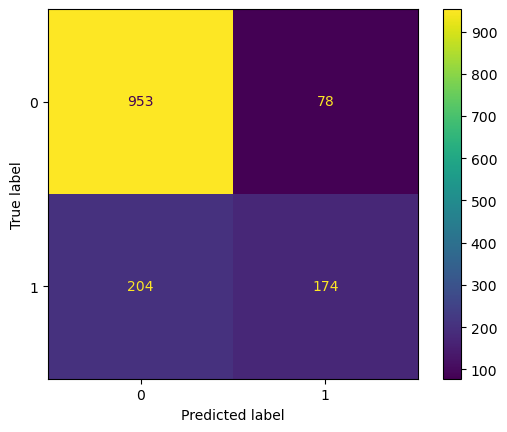

In [13]:

disp_test_log = ConfusionMatrixDisplay(cm_test_log)
disp_test_log.plot()


In [14]:

# Invert the values of y_train and y_test to change the prediction to "whether the customer will not churn"
y_train_inv = y_train.apply(lambda x: 1 if x == 0 else 0)
y_test_inv = y_test.apply(lambda x: 1 if x == 0 else 0)
